<a href="https://colab.research.google.com/github/eharri33/PhysicsI_Labs/blob/main/phy122_N1Lt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title-of-Work

Your Name

Date

#   <font color='Red'> **Import Necessary Modules** </font>

In [5]:
import numpy as np
from numpy.linalg import norm
from numpy import array, sqrt, zeros, arange
import matplotlib.pyplot as plt

π = np.pi

def d(X):
    return np.gradient(X, axis=0)

### <font color='Red'> Before we start lets define the times in which all our experiments will take place. </font>

### <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [6]:
Δt = 0.01 ### s(detector)
t0 = 0
tf = 10

dt       = Δt
timeline = arange(t0, tf, Δt)

#   <font color='Red'> **Experiment 1** </font>

### <font color='Red'> To begin lets start with by defining an initial position. </font>

In [7]:
x_0 = array([1., 0., 0.]) ## m : initial position vector/array

### <font color='Red'> PRINT the distance of the previously defined position vector (give units!): </font>

In [8]:
distance = norm(x_0)

print("the initial distance is %4.3f meters "  % distance)

the initial distance is 1.000 meters 


### <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t. </font>

In [10]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
for t in range(1,len(timeline)):
    x_t[t] = x_t[t-1] + v_t[t-1] * Δt ## numerically integrate the velocity
    v_t[t] = v_t[t-1] ## set new velocity = old velocity (because constant velocity)

### <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

In [11]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory

### <font color='Red'> Make 2 plots of with: x_t and \{v_t, dxdt_t\} in matplotlib, both as a function of time. Make sure to include all LABELS!. </font>

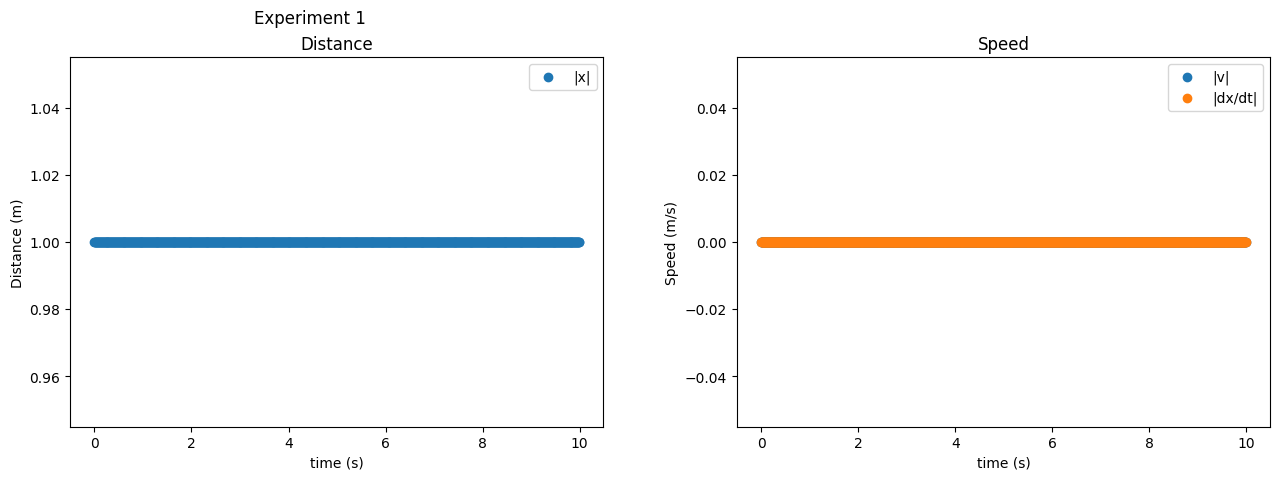

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Experiment 1")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distance (m)")

ax2.scatter(timeline, norm(v_t, axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), label="|dx/dt|")
ax2.set_title("Speed")
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")
fig.show()

We have a distance vs time graph. The object's distance from the origin is constant at 1.00 m as indicated by the horizontal blue line. This means the object does not move closer or farther away from the origin. The next graph is a velocity vs. time graph. The object's velocity is constant as shown with the orange line.This means the object is at a constant distnace from the origin and also stationary with a speed of 0 m/s.

#   <font color='Red'> **Experiment 2** </font>

### <font color='Red'> To begin lets start with by defining an initial position and velocity </font>

In [13]:
x_0 = array([1., 0., 0.]) ## m : initial position vector/array
v_0 = array([1., 0., 0.]) ## m/s : initial velocity vector/array

### <font color='Red'> PRINT out the distance and speed of the previously defined position and velocity vectors: </font>

In [14]:
distance = norm(x_0)
speed    = norm(v_0)

print("the initial distance is %4.3f meters "  % distance )
print("the initial speed    is %4.3f meters/second "  % speed )

the initial distance is 1.000 meters 
the initial speed    is 1.000 meters/second 


### <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t. </font>

In [15]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
for t in range(1,len(x_t)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt ## numerically integrate the velocity
  v_t[t] = v_t[t-1] ## set new velocity = old velocity (because constant velocity)

### <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

### <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>



In [16]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory
dvdt_t = d(v_t)/dt ## take numerical-derivative of the aforementioned velocity-trajectory

### <font color='Red'> Calculate the Average Velocity over time, v_t. </font>

In [17]:
np.sum(v_t, axis=0)/(len(v_t))

array([1., 0., 0.])

### <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and dvdt_t in matplotlib, both as a function of time. Make sure to include all LABELS!. </font>

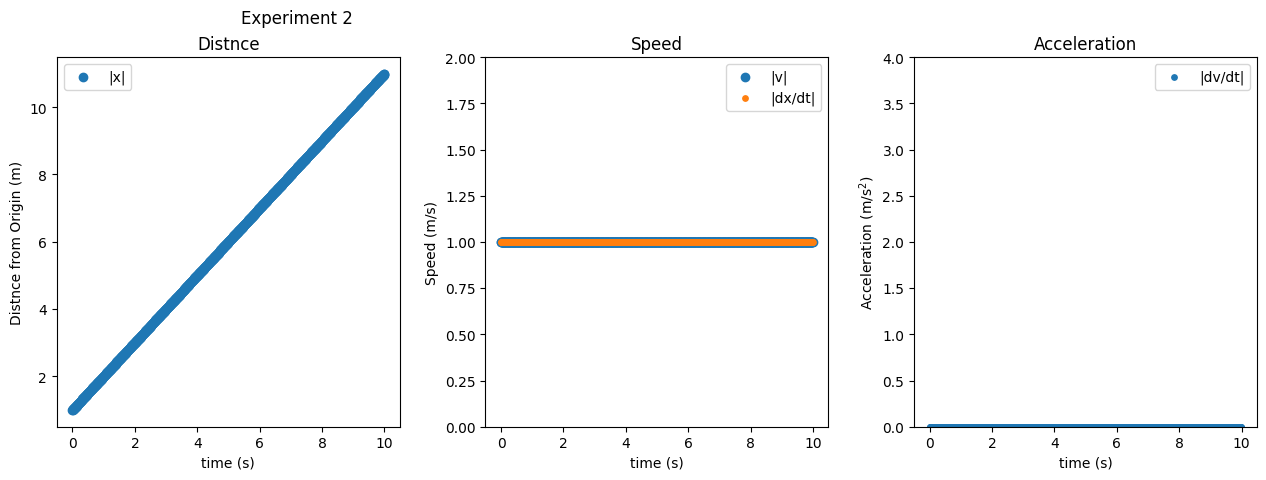

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Experiment 2")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distnce")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distnce from Origin (m)")

ax2.scatter(timeline, norm(v_t   , axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Speed")
ax2.set_ylim([0, 2])
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")

ax3.scatter(timeline, norm(dvdt_t, axis=1), s=15, label="|dv/dt|")
ax3.set_ylim([0, 4])
ax3.set_title("Acceleration")
ax3.set(xlabel="time (s)", ylabel="Acceleration (m/s$^2$)")
ax3.legend()
fig.show()

In the distance vs time graph, the object is moving from the origin which seems like a constant speed since the blue line is straight with no curves or turns. In the velocity vs time graph, the object seems to be moving at a constant speed of 1 m/s which makes since with the distance vs time graph being a straight line. In the acceleration vs time graph, the acceleration seems to be constant at 0 m/s. This makes sense because the object seems to be moving at a constant speed and not slowing down, speeding up, or changing direction.

#   <font color='Red'> **Experiment 3** </font>

###  <font color='Red'> To begin lets start with by defining an initial position, velocity, and acceleration </font>

In [19]:
x_0 = array([1., 0., 0.]) ## m : initial position vector/array
v_0 = array([1., 0., 0.]) ## m/s : initial velocity vector/array
a_0 = array([2., 0., 0.]) ## m/s/s : initial acceleration vector/array

###  <font color='Red'> PRINT out the distance, speed, and magnitude of the acceleration of the previously defined vectors: </font>

In [21]:
distance     = norm(x_0)
speed        = norm(v_0)
acceleration = norm(a_0)

print("the initial distance     is %4.3f meters "  % distance)
print("the initial speed        is %4.3f meters/second "  % speed)
print("the initial acceleration is %4.3f meters/second/second "  % acceleration)

the initial distance     is 1.000 meters 
the initial speed        is 1.000 meters/second 
the initial acceleration is 2.000 meters/second/second 


###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [22]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = zeros((len(timeline), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = a_0 ## initialize the 0th acceleration-trajectory entry to the initial-acceleration
for t in range(1,len(x_t)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt ## Velocity-Verlet Step 1 : find new position from old data
  a_t[t] = a_t[t-1] ## Velocity-Verlet Step 2 : find new acceleraiton from old acceleraiton
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

###  <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###  <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

###  <font color='Red'> Take a time-derivative of a_t to obtain dadt_t. </font>

In [23]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory
dvdt_t = d(v_t)/dt ## take numerical-derivative of the aforementioned velocity-trajectory
dadt_t = d(a_t)/dt ## take numerical-derivative of the aforementioned acceleration-trajectory

###  <font color='Red'> Make 4 plots of with: x_t, \{v_t, dxdt_t\}, \{ a_t, dvdt_t\}, and dadt_t in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

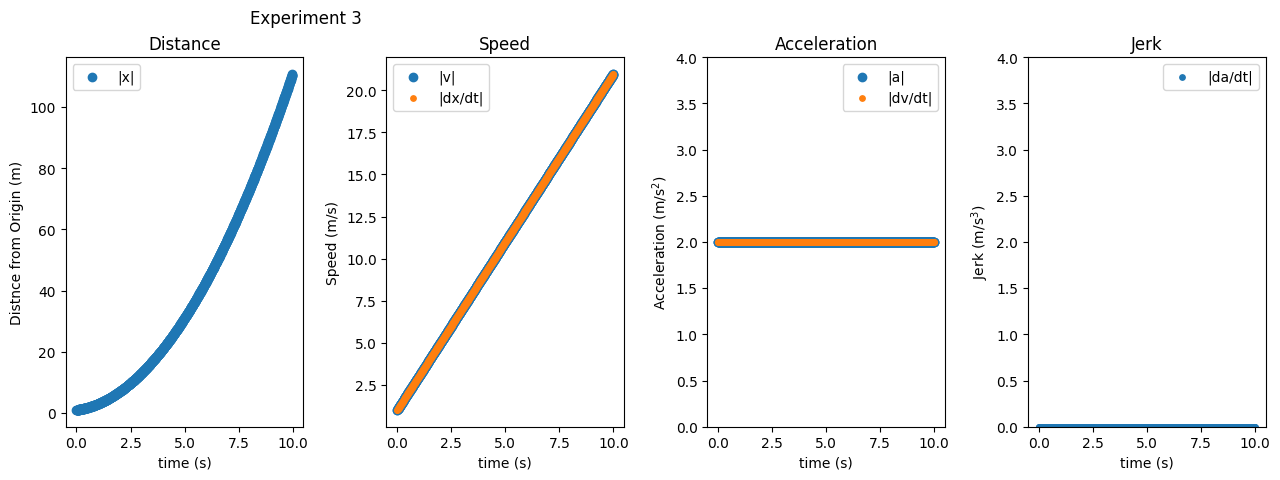

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Experiment 3")
fig.subplots_adjust(hspace=0.01, wspace=0.35, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distnce from Origin (m)")

ax2.scatter(timeline, norm(v_t   , axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Speed")
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")

ax3.scatter(timeline, norm(a_t   , axis=1), label="|a|")
ax3.scatter(timeline, norm(dvdt_t, axis=1), s=15, label="|dv/dt|")
ax3.set_ylim([0, 4])
ax3.set_title("Acceleration")
ax3.legend()
ax3.set(xlabel="time (s)", ylabel="Acceleration (m/s$^2$)")

ax4.scatter(timeline, norm(dadt_t, axis=1), s=15, label="|da/dt|")
ax4.set_ylim([0, 4])
ax4.set_title("Jerk")
ax4.set(xlabel="time (s)", ylabel="Jerk (m/s$^3$)")
ax4.legend()
fig.show()

The initial distance from the origin is 0m. Over time the distance increases dramatically to around 110m in 10s. In the velocity vs time graph, the speed increases linearly to about 21 m/s at 10s matching v=at which is 2.1 m/s^2 confirming the constant acceleration. the jerk remains at 0 confirming that the acceleration is constant.

#   <font color='Red'> **Experiment 4** </font>

###   <font color='Red'> To begin lets start given the following initial position, velocity, and acceleration, WITH velocity and acceleration in different directions! </font>

In [25]:
x_0 = array([10., 0., 0.]) ## m : initial position vector/array
v_0 = array([50., 0., 0.]) ## m/s : initial velocity vector/array
a_0 = array([-9.81, 0., 0.]) ## m/s/s : initial acceleration vector/array

###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [26]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = zeros((len(timeline), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = a_0 ## initialize the 0th acceleration-trajectory entry to the initial-acceleration
for t in range(1,len(x_t)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt ## Velocity-Verlet Step 1 : find new position from old data
  a_t[t] = a_t[t-1] ## Velocity-Verlet Step 2 : find new acceleraiton from old acceleraiton
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

###  <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###  <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

###  <font color='Red'> Take a time-derivative of a_t to obtain dadt_t. </font>

In [27]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory
dvdt_t = d(v_t)/dt ## take numerical-derivative of the aforementioned velocity-trajectory
dadt_t = d(a_t)/dt ## take numerical-derivative of the aforementioned acceleration-trajectory

###  <font color='Red'> Make 4 plots of with: x_t, \{v_t, dxdt_t\}, \{ a_t, dvdt_t\}, and dadt_t in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

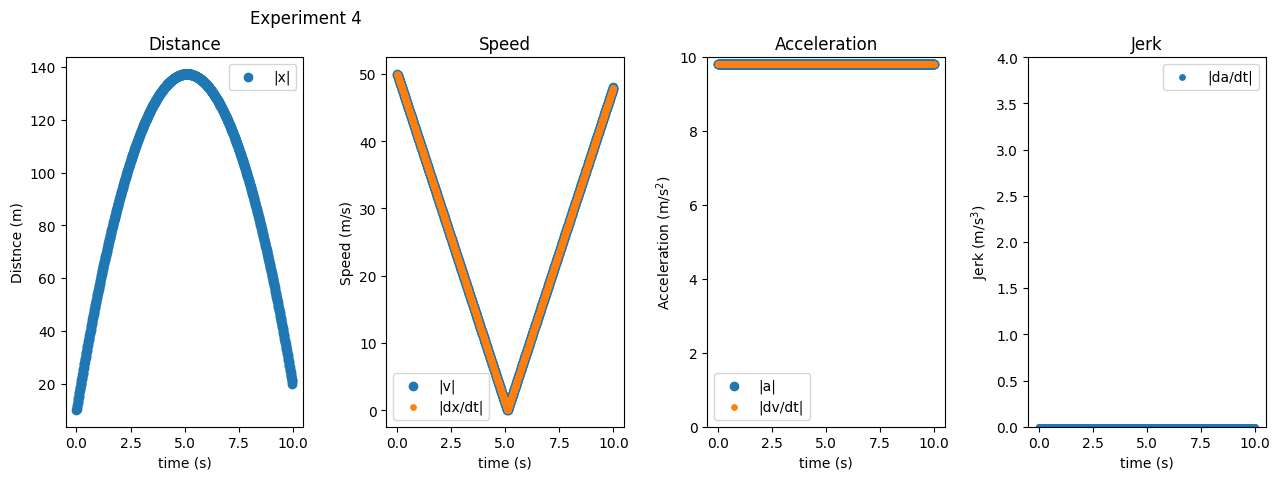

In [28]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Experiment 4")
fig.subplots_adjust(hspace=0.05, wspace=0.35, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distnce (m)")

ax2.scatter(timeline, norm(v_t   , axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Speed")
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")

ax3.scatter(timeline, norm(a_t   , axis=1), label="|a|")
ax3.scatter(timeline, norm(dvdt_t, axis=1), s=15, label="|dv/dt|")
ax3.set_ylim([0, 10])
ax3.set_title("Acceleration")
ax3.legend()
ax3.set(xlabel="time (s)", ylabel="Acceleration (m/s$^2$)")

ax4.scatter(timeline, norm(dadt_t, axis=1), s=15, label="|da/dt|")
ax4.set_ylim([0, 4])
ax4.set_title("Jerk")
ax4.legend()
ax4.set(xlabel="time (s)", ylabel="Jerk (m/s$^3$)")
ax4.legend()
fig.show()

This experiment describes the motion of an object with constant acceleration.The object starts with an initial speed of aproximately 50 m/s and decelerates at a constant rate of 10 m/s^2. Around 5 seconds, the object stops momentarily and reaches its max distance from the origin. After 5 seconds the object accelerates in the opposite direction at a constant rate reaching roughly 50 m/s at t=10 sec. The jerk is at zero because it seems to be no rapid change in acceleration.

#   <font color='Red'> **Conclusion** </font>

###  <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###  <font color='Red'> Demostrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>

In conclusion, the first lab seems to be making sure that we understand position graphs and the basic conceptual concepts. The first experiment seems to show an object at rest and at a constant distance.
Experiment 2 introduces acceleration and an object moving at a constant rate in the same linear direction. Experiment 3 introduces jerk which is a rapid change in acceleration. This object also was moving linearly at a constant rate.
Experiment 4 introduces an object that's changing direction and gets to a high velocity with constant acceleration. All the experiments are the fundamentals of time, displacement, and velocity. We need to understand these concepts before we can go any further in this physics class.
